In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from PIL import Image

In [2]:
print(os.listdir('../input/shopee-product-matching/'))

['sample_submission.csv', 'train_images', 'train.csv', 'test.csv', 'test_images']


In [3]:
train = pd.read_csv('../input/shopee-product-matching/train.csv')
test = pd.read_csv('../input/shopee-product-matching/test.csv')
sample_submission = pd.read_csv('../input/shopee-product-matching/sample_submission.csv')

In [4]:
print(f'len: {len(train)}')
train.head()

len: 34250


,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [5]:
print(f'len: {len(test)}')
test.head()

len: 3


,posting_id,image,image_phash,title
0,test_2255846744,0006c8e5462ae52167402bac1c2e916e.jpg,ecc292392dc7687a,Edufuntoys - CHARACTER PHONE ada lampu dan mus...
1,test_3588702337,0007585c4d0f932859339129f709bfdc.jpg,e9968f60d2699e2c,(Beli 1 Free Spatula) Masker Komedo | Blackhea...
2,test_4015706929,0008377d3662e83ef44e1881af38b879.jpg,ba81c17e3581cabe,READY Lemonilo Mie instant sehat kuah dan goreng


In [6]:
print(f'len: {len(test)}')
sample_submission.head()

len: 3


,posting_id,matches
0,test_2255846744,test_2255846744
1,test_3588702337,test_3588702337
2,test_4015706929,test_4015706929


In [7]:
ROOT_DIR = '../input/shopee-product-matching/'
TRAIN_PATH = ROOT_DIR + 'train_images/'
TEST_PATH = ROOT_DIR + 'test_images/'

print(os.listdir('../input/shopee-product-matching/train_images/')[0])

07c251a26b8266c85730ab8d870f1356.jpg


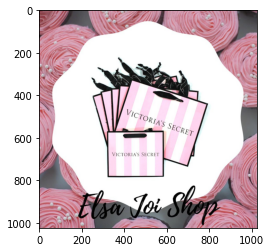

In [8]:
path = ROOT_DIR + 'train_images/' + train.loc[0, 'image']
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [9]:
print(f'img.shape: {img.shape}')

img.shape: (1024, 1024, 3)


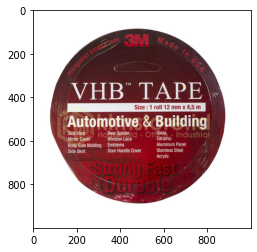

In [10]:
path = TRAIN_PATH + train.loc[1, 'image']
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

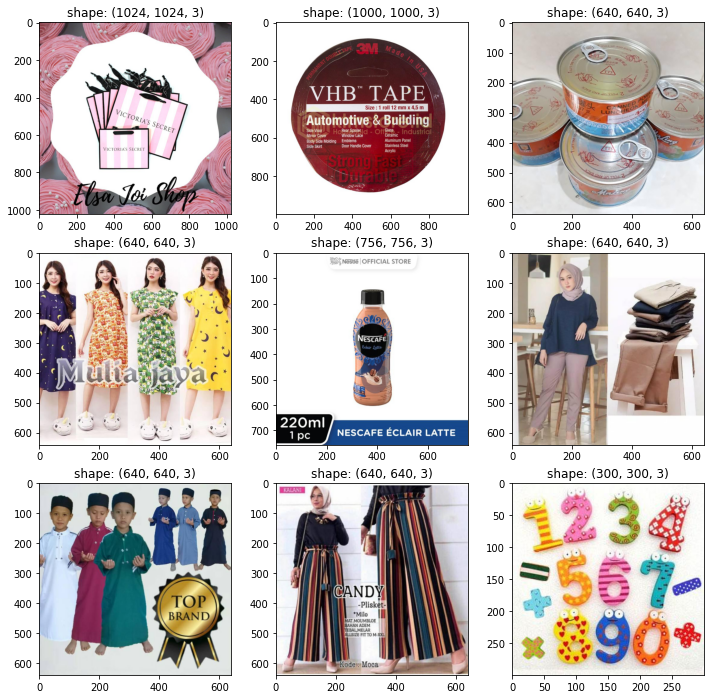

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for i in range(9):
    path = TRAIN_PATH + train.loc[i, 'image']
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i//3, i%3].imshow(img)
    axes[i//3, i%3].set_title(f'shape: {img.shape}')
plt.show()

Paper Bag Victoria Secret


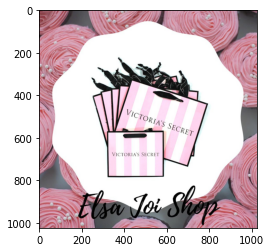

In [12]:
path = TRAIN_PATH + train.loc[0, 'image']
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f"{train.loc[0, 'title']}")
plt.imshow(img)
plt.show()

Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DOUBLE FOAM TAPE


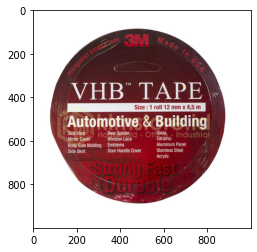

In [13]:
path = TRAIN_PATH + train.loc[1, 'image']
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f"{train.loc[1, 'title']}")
plt.imshow(img)
plt.show()

Maling TTS Canned Pork Luncheon Meat 397 gr


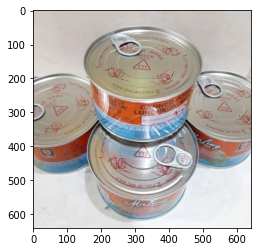

In [14]:
path = TRAIN_PATH + train.loc[2, 'image']
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f"{train.loc[2, 'title']}")
plt.imshow(img)
plt.show()

Edufuntoys - CHARACTER PHONE ada lampu dan musik/ mainan telepon


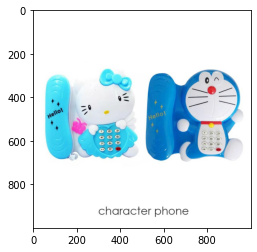

In [15]:
path = TEST_PATH + test.loc[0, 'image']
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f"{test.loc[0, 'title']}")
plt.imshow(img)
plt.show()

In [16]:
train.groupby("label_group").count()

,posting_id,image,image_phash,title
label_group,,,,
258047,3,3,3,3
297977,2,2,2,2
645628,12,12,12,12
801176,2,2,2,2
887886,2,2,2,2
...,...,...,...,...
4292154092,2,2,2,2
4292520070,11,11,11,11
4292939171,2,2,2,2


<AxesSubplot:xlabel='posting_id', ylabel='count'>

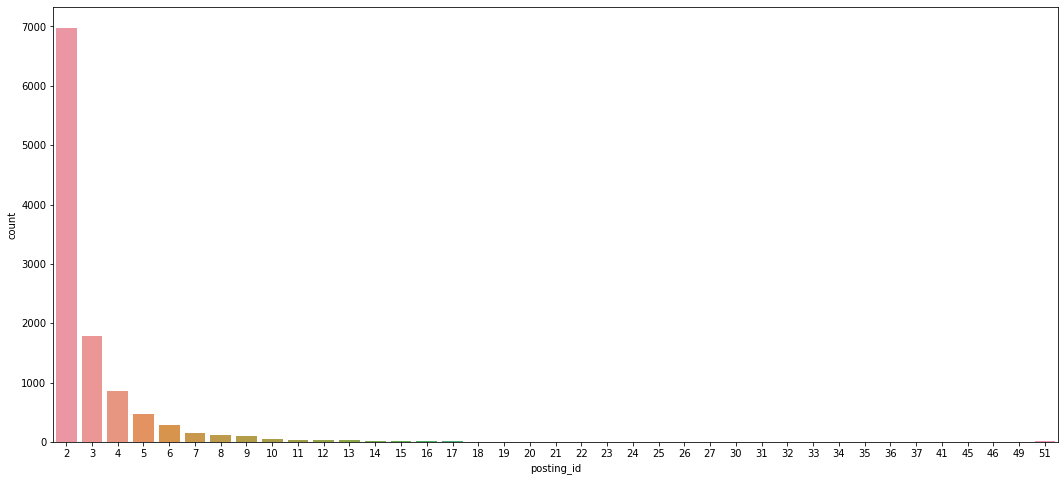

In [17]:
plt.figure(figsize=(18, 8))
sns.countplot(x = train.groupby('label_group').count()['posting_id'])

In [18]:
idx = train.groupby('label_group').count()['posting_id'].argmax()
label = train.groupby('label_group').count().index[idx]
train_2 = train[train['label_group'] == label].reset_index(drop=True)
train_2.head()

,posting_id,image,image_phash,title,label_group
0,train_207039286,09165142230c0d600c02a66f62dbee5d.jpg,8b1cbc63e330c69d,Ready Stock - Gluta Collagen Soap By Beautetox...,159351600
1,train_1619338643,0ff3d417c454a614596da0f160e85b83.jpg,e3d894276a58c1de,GLUTA COLLAGEN SOAP BY BEAUTETOX SKINSUPERSTAR,159351600
2,train_3721308865,136d7ea9fefe1cc04b6a8dfd965cbc9e.jpg,faad9752e4991162,KIRIM SETIAP HARI!! GLUTA COLLAGEN SOAP BEAUTE...,159351600
3,train_1851882944,18244a8fdbb3aa0b5afb6c31d99134a5.jpg,e893a3d4a48d3973,[Ready & Resmi] Gluta Soap Beautetox Viral,159351600
4,train_1236075269,1e4b5a9adc92e50df500e24d935fe0db.jpg,a0c4be17b3393693,READY STOK [THE3ANGLE-KD] Gluta Collagen Beaut...,159351600


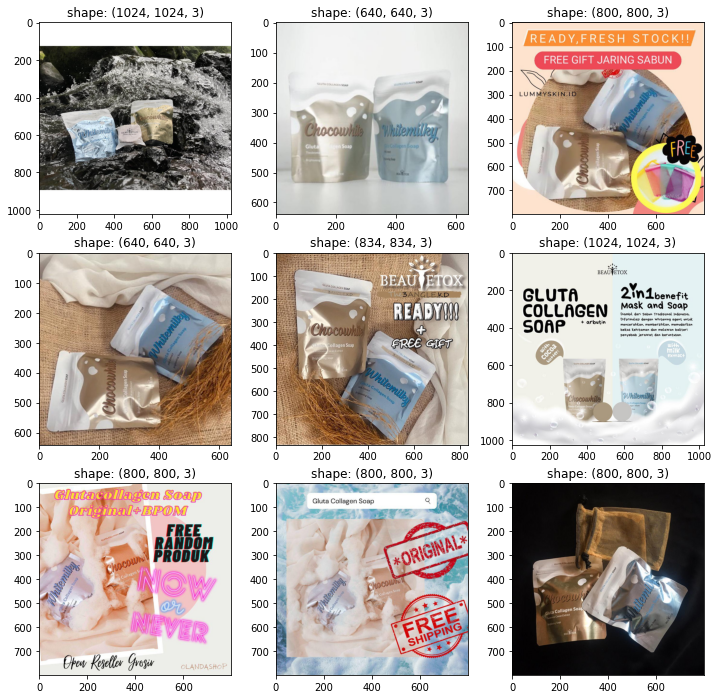

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for i in range(9):
    path = TRAIN_PATH + train_2.loc[i, 'image']
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i//3, i%3].imshow(img)
    axes[i//3, i%3].set_title(f'shape: {img.shape}')
plt.show()

Ready Stock - Gluta Collagen Soap By Beautetox / Sabun Viral Tiktok / Sabun gluta colagen


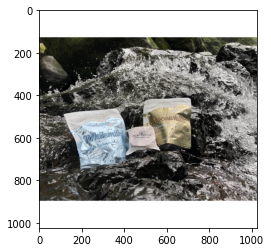

In [20]:
path = TRAIN_PATH + train_2.loc[0, 'image']
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f"{train_2.loc[0, 'title']}")
plt.imshow(img)
plt.show()

GLUTA COLLAGEN SOAP BY BEAUTETOX SKINSUPERSTAR


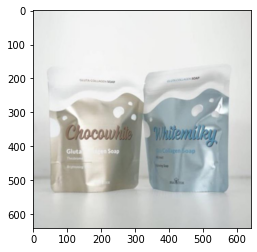

In [21]:
path = TRAIN_PATH + train_2.loc[1, 'image']
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f"{train_2.loc[1, 'title']}")
plt.imshow(img)
plt.show()

KIRIM SETIAP HARI!! GLUTA COLLAGEN SOAP BEAUTETOX CHOCOWHITE WHITEMILKY


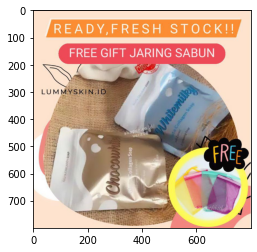

In [22]:
path = TRAIN_PATH + train_2.loc[2, 'image']
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(f"{train_2.loc[2, 'title']}")
plt.imshow(img)
plt.show()

## additional EDA

In [23]:
train.head()

,posting_id,image,image_phash,title,label_group
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069


In [24]:
for col in train.columns:
    print(f'nunique of {col}: {train[col].nunique()}')

nunique of posting_id: 34250
nunique of image: 32412
nunique of image_phash: 28735
nunique of title: 33117
nunique of label_group: 11014


In [25]:
train[train.duplicated(keep=False, subset='image')]

,posting_id,image,image_phash,title,label_group
11,train_2496690777,001e11145b8e9bf5ac51110c0fdd8697.jpg,eab5c295966ac368,PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH...,509010932
12,train_2771755203,001e11145b8e9bf5ac51110c0fdd8697.jpg,eab5c295966ac368,PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH...,509010932
28,train_1572286671,00416d439a613fb6cbede5cfc95176e6.jpg,bb3fccc4c013c3e1,Pakaian Dalam Cewek Wings Bra Bra Tempel Seam...,532279668
29,train_3117535609,00416d439a613fb6cbede5cfc95176e6.jpg,bb3fccc4c013c3e1,WINGs BRA-BRA TEMPEL SEAMLESS - PUSH UP BRA - ...,532279668
56,train_2281183509,007fca8ce9a042f9e1656ce8f96ba19d.jpg,e29b9d52d8a649ac,DZUVIA TUNIK / NEDA TUNIK,1356633425
...,...,...,...,...,...
34190,train_2438146037,ff8c51ae2b910bbd5b185932fafd81d5.jpg,e4649b9b6d656494,Wardah Nature Daily Orange Pomelo Brightening ...,4230940845
34224,train_3943315801,ffc7391f30199535379accf6862e1263.jpg,a3f27e812323d46d,DETERGENT SLEEK BABY LAUNDRY KEMASAN BOTOL 1200ML,3725072369
34225,train_2822476848,ffc7391f30199535379accf6862e1263.jpg,a3f27e812323d46d,Sleek Baby Laundry Detergent Botol 1200 ml / S...,3725072369
34242,train_3445757395,ffec72f12011f37a8ade8fc5ec3a571c.jpg,ab37362b173630aa,Johnson\xe2\x80\x99s Top to Toe Hair & Body Ba...,3561125014


- posting_id以外は全てが等しいレコードがある。これらは学習しなくてもルールベースで判断可能な気もする。(学習させても容易だとは思うから特別に扱う必要はないかもしれない。)
- nuniqueが image > image_phash と言うことは、imageは違うけどimage_phashは等しいということがあるということか。どういうことだろう...